In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("../Data/PS_20174392719_1491204439457_log.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [31]:
df.describe()
#looking at mean and median of amount 
#mean greater than median, right skewed, indicates outliers 
#this means outliers are large amounts 

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Univariate analysis 

##### Amount Variable 
- Observations: The amount variable is right skewed. This is an indicators that our dataset contains a majority of large amounts of money transferred.

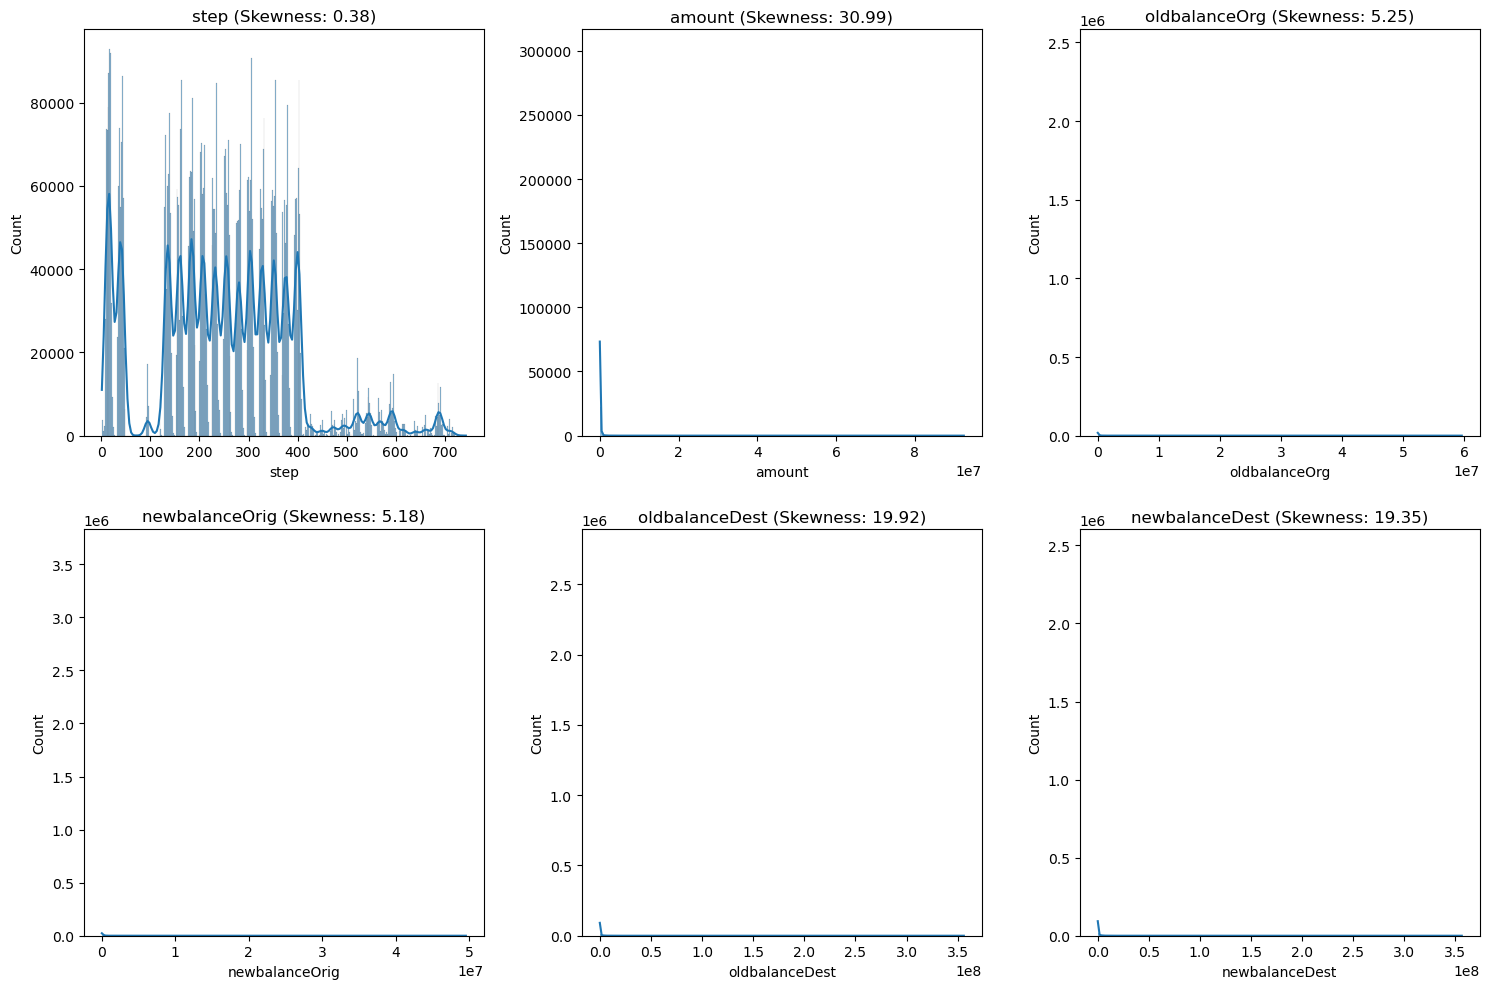

step               0.375177
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64

In [126]:
# Calculating the skewness of each feature
to_drop = ['isFraud', "isFlaggedFraud", "nameDest", "nameOrig","type"]
other_columns = df.drop(to_drop, axis=1).columns
feature_skewness = df[other_columns].skew()

# Plotting histograms for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(other_columns, 1):  # Excluding the target variable
    plt.subplot(2, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} (Skewness: {feature_skewness[column]:.2f})')

plt.tight_layout()
plt.show()

feature_skewness

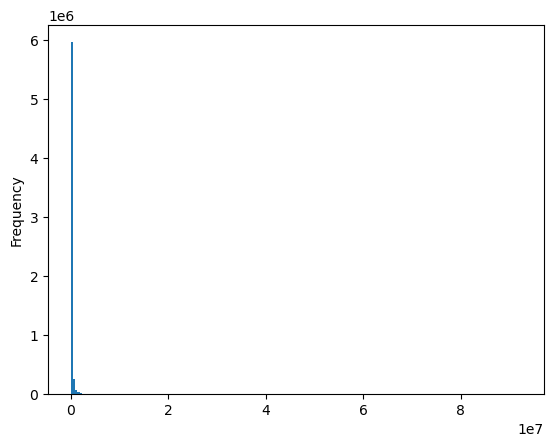

In [40]:
df["amount"].plot.hist(bins=200)
plt.show()

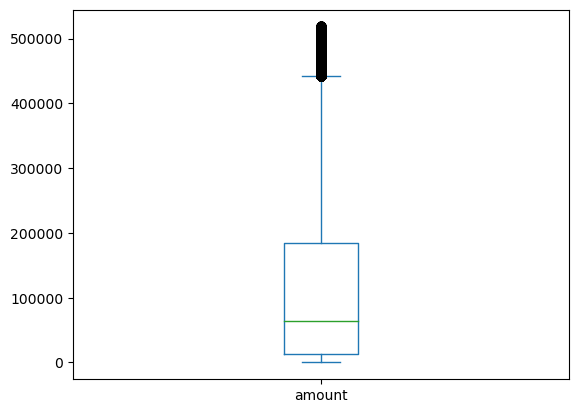

In [58]:
trim_df = df[df['amount'] < df['amount'].quantile(0.95)]
trim_df["amount"].plot.box()
plt.show()

##### NewBalanceOrg
- Observation: This histogram is right skewed. This means that origin accounts after transaction, are primarily large amounts. 

<function matplotlib.pyplot.show(close=None, block=None)>

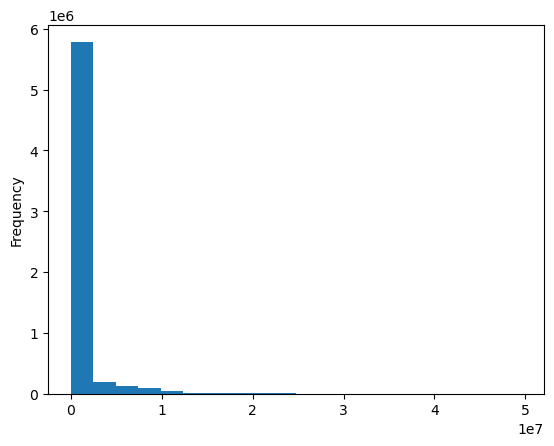

In [33]:
df["newbalanceOrig"].plot.hist(bins=20)
plt.show

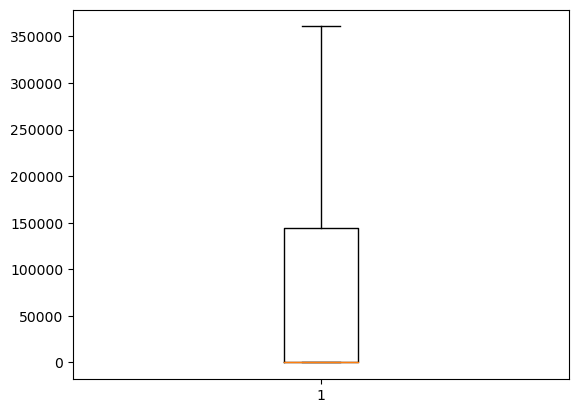

In [61]:
plt.boxplot(df["newbalanceOrig"], showfliers=False)
plt.show()

#### PairGrid of DF
- Observation: 
    - OldBalanceDest: The destination accounts for transactions that were fraud were to SMALLER amount accounts

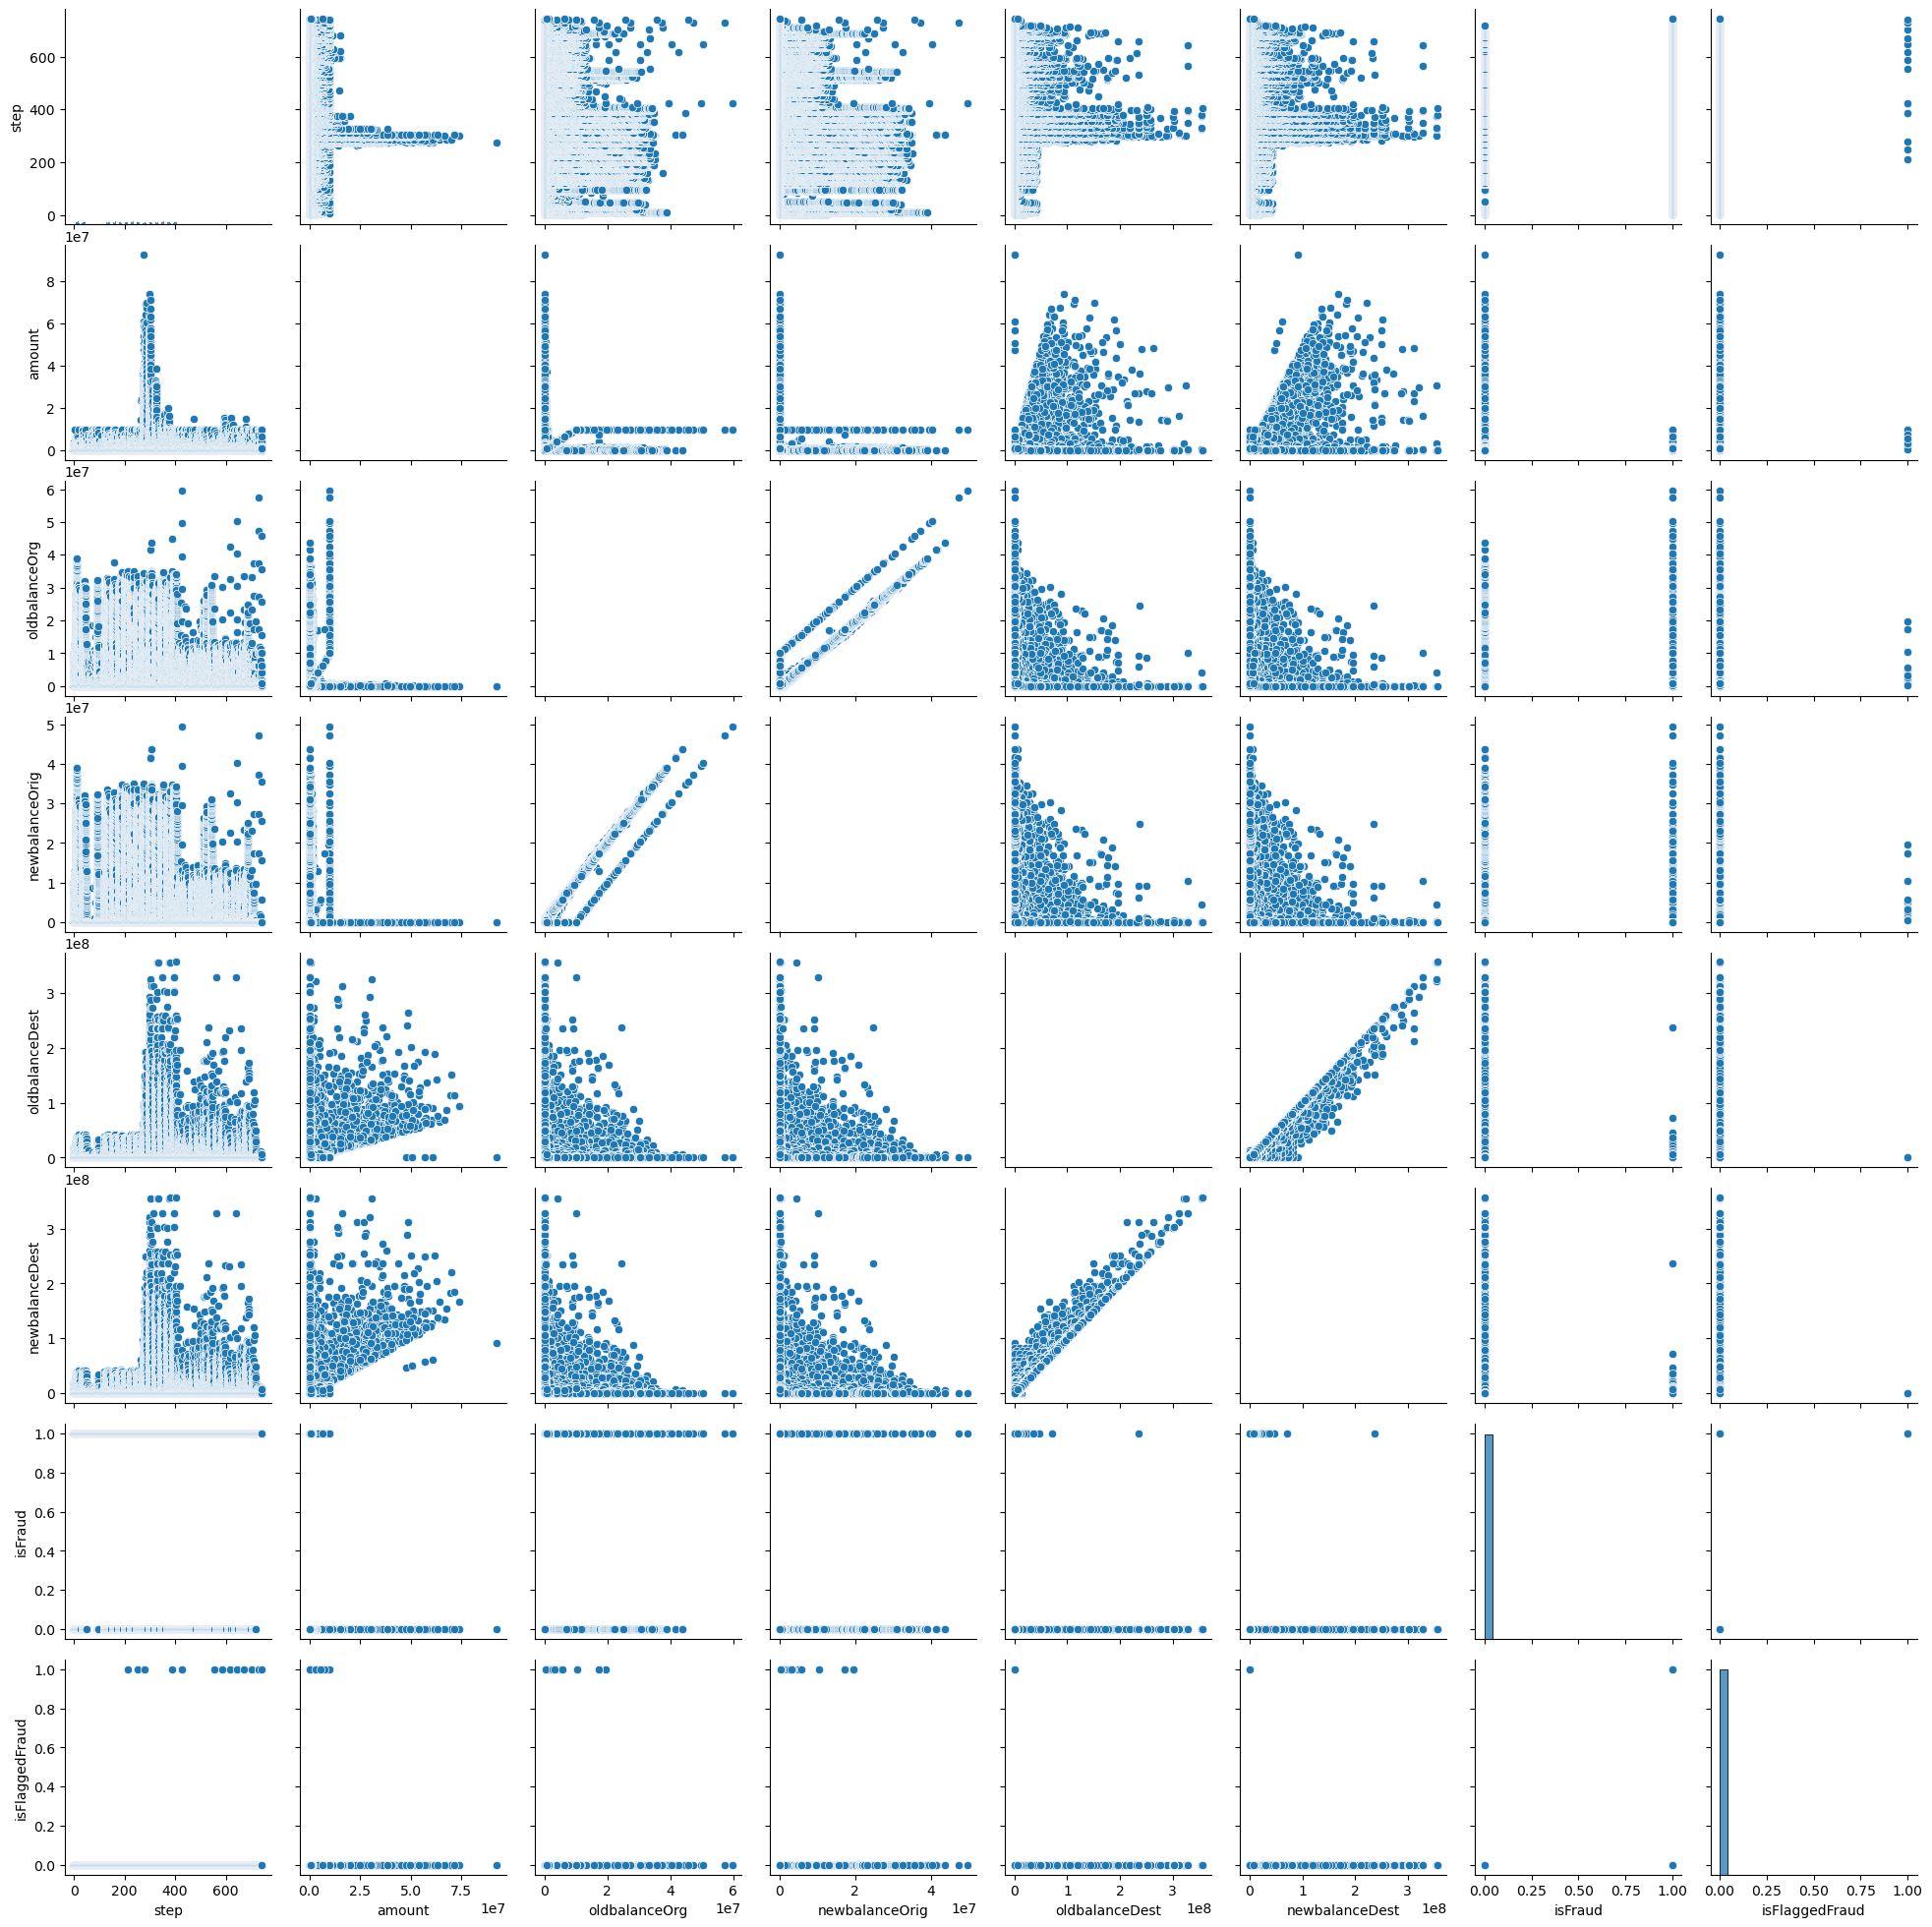

In [ ]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: xlabel='amount', ylabel='newbalanceDest'>

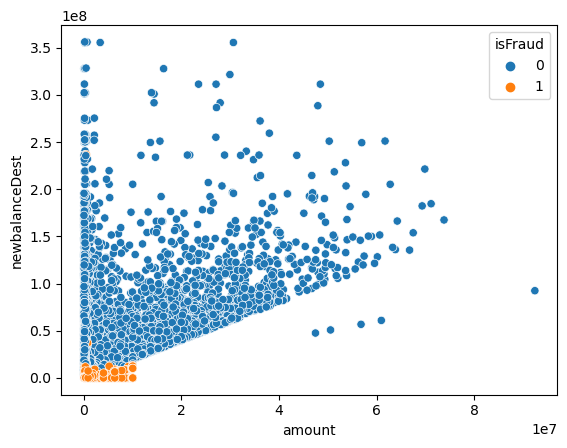

In [5]:
sns.scatterplot(data=df, x="amount", y="newbalanceDest", hue="isFraud")

<Axes: xlabel='type'>

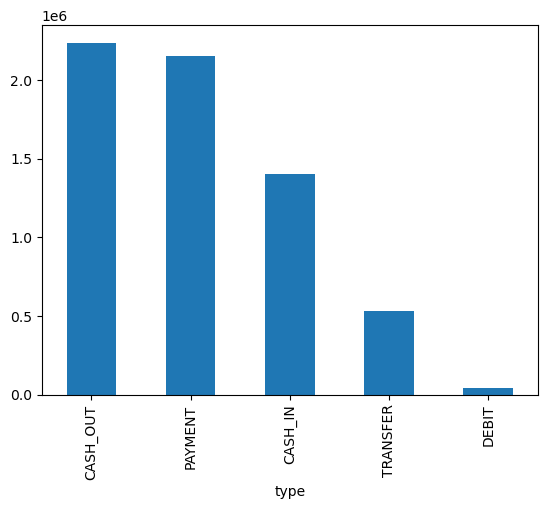

In [35]:
df["type"].value_counts().plot.bar()

<Axes: xlabel='isFraud'>

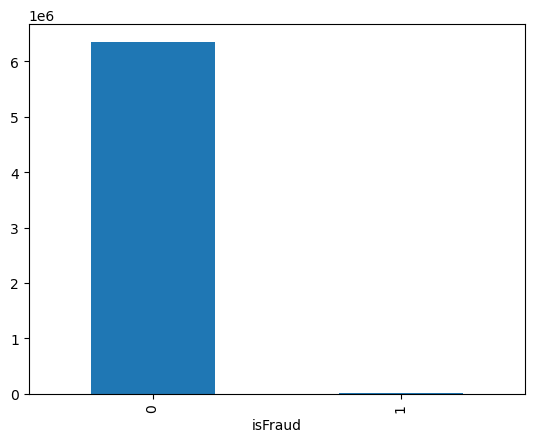

In [3]:
df["isFraud"].value_counts().plot.bar()

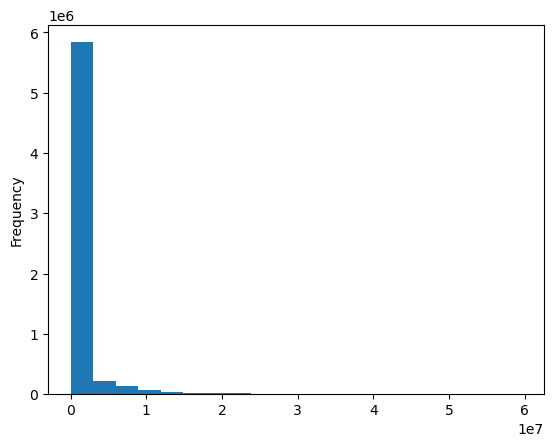

In [53]:
df["oldbalanceOrg"].plot.hist(bins=20)
plt.show()
#Old balance is right skewed, mean > median

## Bivariate Analysis 

##### Correlation Heatmap
- There is a high correlation between the predictors of amount and oldbalanceDest 
- There is a high correlation between the predictors of amount and newbalanceDest
- There is some correlation between our target Variable, isFraud and the amount transferred "amount" 

<Axes: >

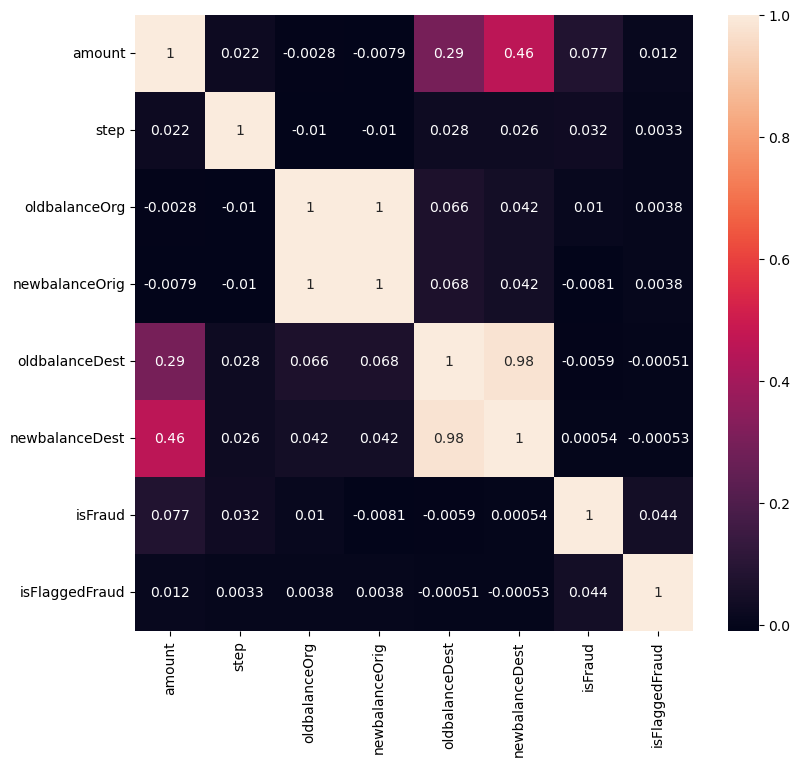

In [109]:
selected_col = ["amount", "step", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud", "isFlaggedFraud" ]

plt.figure(figsize=(9, 8))

sns.heatmap(df[selected_col].corr(), annot=True)

<Axes: xlabel='amount', ylabel='oldbalanceDest'>

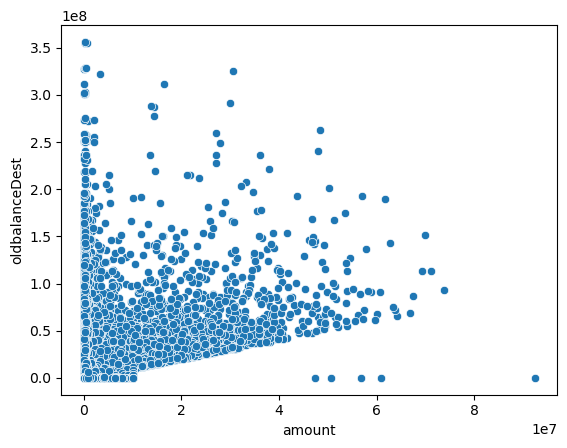

In [73]:
sns.scatterplot(data=df, x="amount", y="oldbalanceDest")

<Axes: xlabel='amount', ylabel='newbalanceDest'>

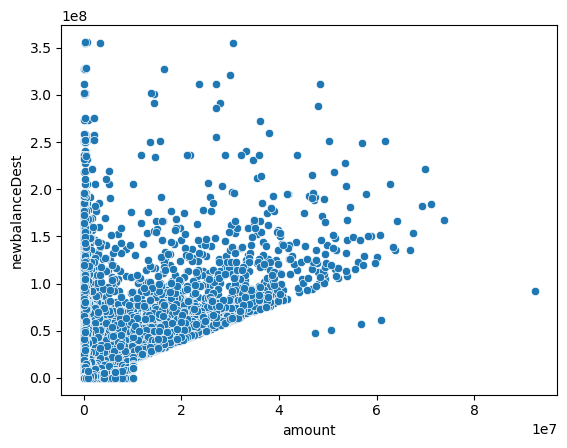

In [75]:
sns.scatterplot(data=df, x="amount", y="newbalanceDest")

<Axes: xlabel='isFraud', ylabel='amount'>

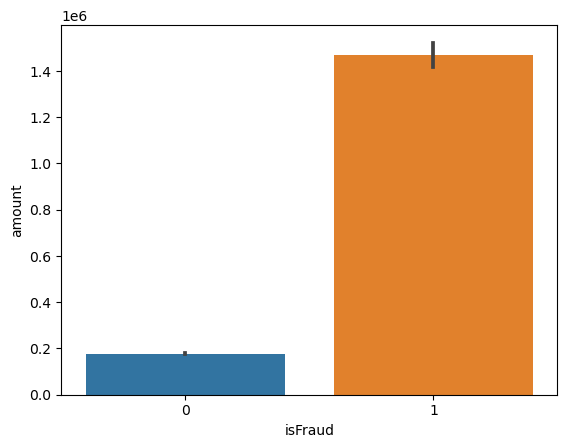

In [127]:
sns.barplot(data=df, x="isFraud", y="amount")

#### Bar Plot - Type/Amount/isFraud
- Observation: Most of the fraud took place in the transactions types of Transfers and Cash outs

/Users/carlosm/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


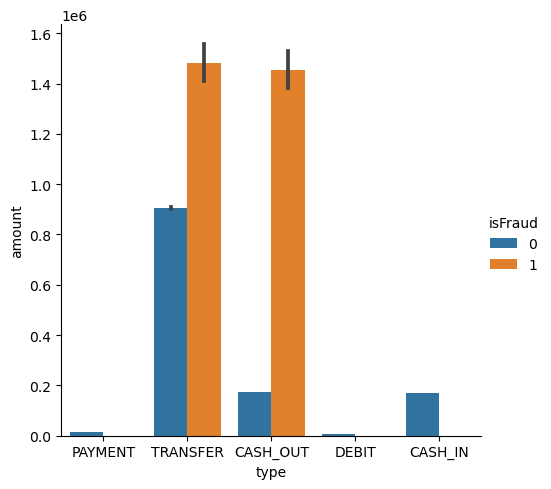

In [117]:
sns.catplot(data=df, x="type", y="amount", hue="isFraud", kind="bar")
plt.show()